In [24]:
import numpy as np
from vpi.io import *
from collections import *
import math

In [25]:
class ImageInfo:
    def __init__(self, image):
        image_size = image.size
        self.histogram = self._calc_histogram(image)
        self.mean = self._calc_mean(self.histogram, image_size)
        self.std_dev = self._calc_standard_deviation(self.histogram, self.mean, image_size)
        
    def _calc_histogram(self, image):
        # Entre com seu código aqui
        histogram = np.zeros(256).astype(int) 
        H, W = image.shape
        for i in range(H):
            for j in range(W):
                histogram[image[i,j]] = histogram[image[i,j]] + 1
        return histogram
        
    
    def _calc_mean(self, hist, image_size):
        # Entre com seu código aqui
        mean_i = 0
        for i in range(256):
            mean_i = mean_i + i*hist[i]
        mean_i = float(mean_i/image_size)
        return mean_i
    
    def _calc_standard_deviation(self, hist, mean, image_size):
        # Entre com seu código aqui
        sd = 0
        for i in range(256):
            sd = sd + hist[i]*(i-mean)**2

        sd = float(sd /(image_size-1))
        sd = math.sqrt(sd)
        return sd
    
def calc_rel_hist(info, f):    
    # Entre com seu código aqui
    rela_hist = np.zeros(256).astype(float)
    for i in range(256):
        rela_hist[i] = float(info.histogram[i]/f.size)
    return rela_hist

def calc_acc_rel_hist(freq):
    # Entre com seu código aqui
    ar_hist = np.zeros(256).astype(float)
    ar_hist[0] = freq[0]
    for i in range(1,256):
        ar_hist[i] = ar_hist[i-1] + freq[i]
    return ar_hist
    

def calc_equalize_transformation(acc_rel_hist, max_grayscale = 255):
    # Entre com seu código aqui
    T =  np.floor(acc_rel_hist*max_grayscale).astype(int)
    return T
    
def equalize(f):
    info = ImageInfo(f)
    rel_hist = calc_rel_hist(info, f)
    acc_rel_hist = calc_acc_rel_hist(rel_hist)
    T = calc_equalize_transformation(acc_rel_hist)
    return T[f]

In [26]:
def neighbors_8(f, pto):
    list_of_neighbors = []
    n1, n2 = f.shape
    if (pto[0] - 1) >= 0:
        list_of_neighbors.append((pto[0]-1, pto[1]))
        if (pto[1] -1) >=0:
            list_of_neighbors.append((pto[0]-1, pto[1]-1))
        if (pto[1] + 1) < n2:
            list_of_neighbors.append((pto[0]-1, pto[1]+1))
    if (pto[1] - 1) >= 0:
        list_of_neighbors.append((pto[0], pto[1]-1))
        if (pto[0] + 1) < n1:
            list_of_neighbors.append((pto[0]+1, pto[1]-1))
    if (pto[0] + 1) < n1:
        list_of_neighbors.append((pto[0]+1, pto[1]))
        if (pto[1] + 1) < n2:
            list_of_neighbors.append((pto[0]+1, pto[1]+1))
    if (pto[1] + 1) < n2:
        list_of_neighbors.append((pto[0], pto[1]+1))
    return list_of_neighbors           

In [32]:
def labeling(f, color):
    g = np.zeros(f.shape).astype(int)
    label = 0
    queue = deque()
    lari = []
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            if (f[i,j] == color and g[i,j] == 0):
                queue.append((i,j)) #insere no lado direito
                label = label + 1 
                lari += [(i, j)]
                g[i,j] = label
                while queue:
                    proximo = queue.popleft() #remove no lado esquerdo
                    for n in neighbors_8(f, proximo):
                        if (f[n] == color and g[n] == 0):
                            g[n] = label
                            queue.append(n)           
    print (lari)
    return g

In [33]:
# questão 5
def count_holes(f):
    g = labeling(f, 255)
    display_image(g)
    holes = g.max() - 1
    h = labeling(f, 0)
    display_image(h)
    no_holes = h.max() - holes
    display_image(equalize(h))
    print(h.max())
    print(holes)
    print (no_holes)


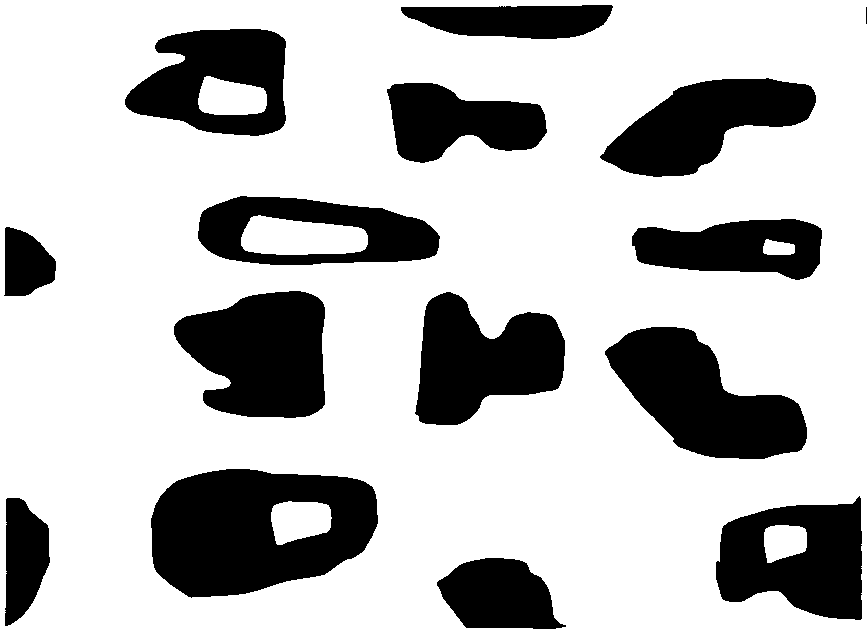

In [36]:
f = read_image("images/pecas_img.png")
display_image(f)

[(0, 0), (76, 206), (215, 258), (239, 766), (501, 288), (525, 775)]


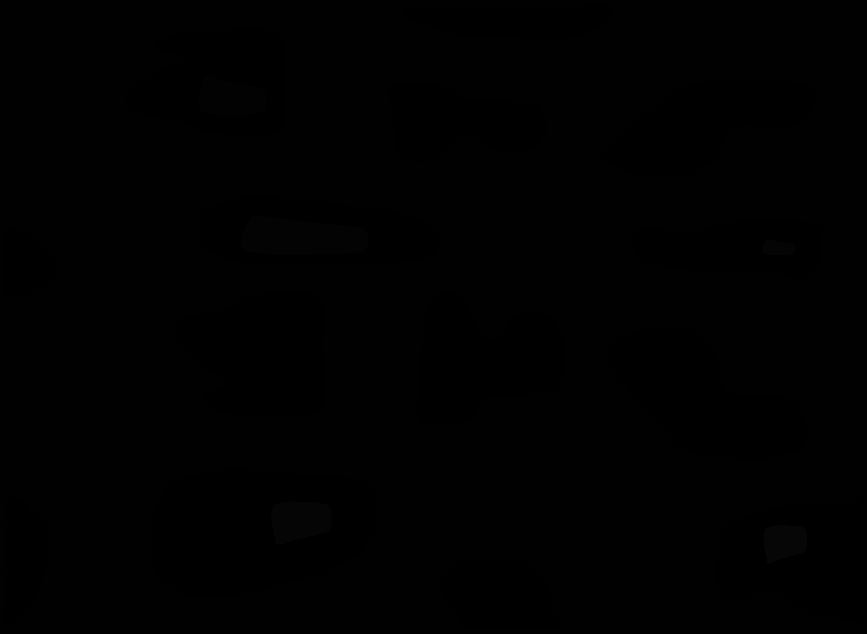

[(5, 582), (7, 866), (29, 230), (78, 766), (83, 404), (196, 240), (219, 781), (227, 6), (291, 289), (292, 446), (327, 651), (469, 226), (496, 859), (498, 7), (558, 485)]


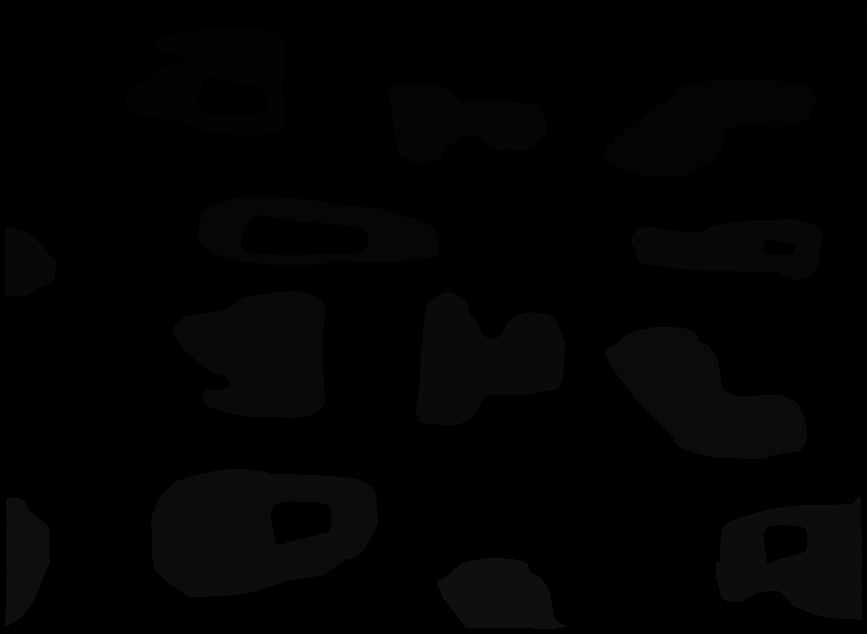

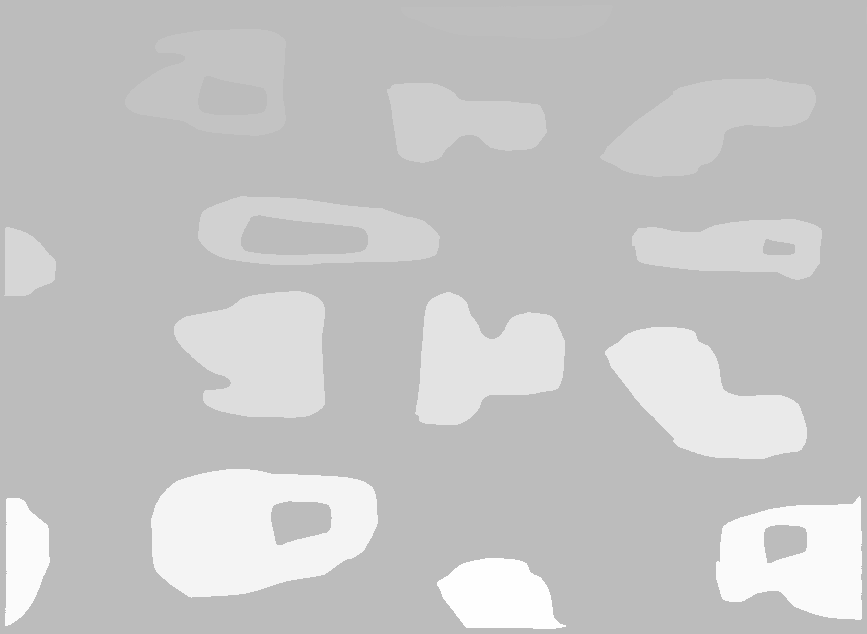

15
5
10


In [37]:
count_holes(f)